In [1]:
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks

Cloning into 'Pandas-Data-Science-Tasks'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.


# **EXPLORATORY DATA ANALYSIS OF SALES DATA **

**importing Pandas and Matplotlib**

In [204]:
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
x=pd.read_csv('/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

In [5]:
all_months=pd.DataFrame()

In [6]:
import os
files=[file for file in os.listdir('/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')]

In [165]:
for file in files:
  df=pd.read_csv('/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'+ file)
  all_months = pd.concat([all_months,df])
all_months.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [166]:
all_months.to_csv('all_data.csv',index=False)

In [167]:
fd=pd.read_csv('/content/all_data.csv')

In [168]:
fd.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


**DATA CLEANING**

**Finding Rows containing NaN values**

In [169]:
null_fd=fd[fd.isna().any(axis=1)]
null_fd

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
371240,NaN,NaN,NaN,NaN,NaN,NaN
371629,NaN,NaN,NaN,NaN,NaN,NaN
372089,NaN,NaN,NaN,NaN,NaN,NaN
372464,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping rows Containing All NAN Values**

In [170]:
fd=fd.dropna(how='all')

**Finding rows with OrderDate columns starting with 'OR'  and Deleting Them**

In [171]:
fd=fd[~fd['Order Date'].str.contains('^Or')]

**Breaking down data into few more columns for better analysis **

In [173]:
fd['month']=fd['Order Date'].str[0:2]
  

In [174]:
fd['month']=fd['month'].astype('int32')

**Adding City column By Breaking down Purchase Address**

In [175]:
new =fd['Purchase Address'].str.split(',', expand=True)

In [176]:
fd['city']=new[1]

**converting columns to correct Data type**

In [178]:
fd['Quantity Ordered']=pd.to_numeric(fd['Quantity Ordered'])
fd['Price Each']=pd.to_numeric(fd['Price Each'])

**Adding sales column to the dataframe **

In [179]:
fd['sales']=fd['Quantity Ordered']*fd['Price Each']

**Grouping By Month to calculate total sales per month **

In [180]:
results=fd.groupby(['month']).sum().sort_values('sales',ascending=False)

In [182]:
x=list(range(1,13))

**VISUALIZING SALES BY MONTH**

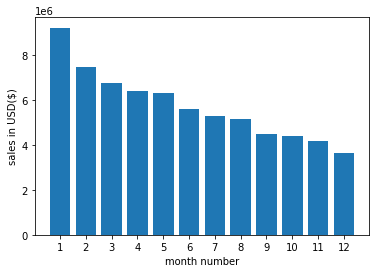

In [183]:
from matplotlib import pyplot as plt
plt.bar(x,results['sales'])
plt.xticks(x)
plt.xlabel('month number')
plt.ylabel('sales in USD($)')

plt.show()

**which US city had the Highest number of Sales**

In [184]:
sales_city=fd.groupby(fd['city']).sum().sort_values('sales',ascending=False)

In [69]:
sales_city

,Quantity Ordered,Price Each,month,sales
city,,,,
San Francisco,50239,8211461.74,315520,8262203.91
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Boston,22528,3637409.77,141112,3661642.01
Atlanta,16602,2779908.20,104794,2795498.58
Dallas,16730,2752627.82,104620,2767975.40
Seattle,16553,2733296.01,104941,2747755.48
Portland,14053,2307747.47,87765,2320490.61
Austin,11153,1809873.61,69829,1819581.75


**VISUALIING SALES BY CITY IN BAR PLOT **

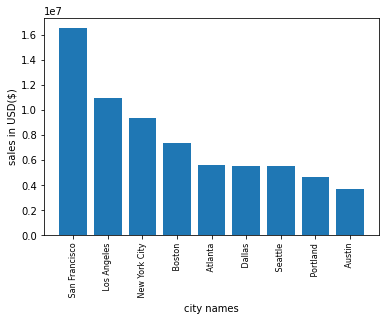

In [186]:

from matplotlib import pyplot as plt

plt.bar(dict(sales_city.iloc[:,0]).keys(),sales_city['sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('city names')
plt.ylabel('sales in USD($)')

plt.show()

## **What time should we display advertisements to maximize likelihood of customer buying a product **

In [187]:
fd['Order Date']=pd.to_datetime(fd['Order Date'])

In [188]:
fd['hour']=fd['Order Date'].dt.hour


In [189]:
fd['minute']=fd['Order Date'].dt.minute
fd['count']=1
hours=[hour for hour,fd in fd.groupby(['hour'])]

**visualizing the distribution of sales by Hour **

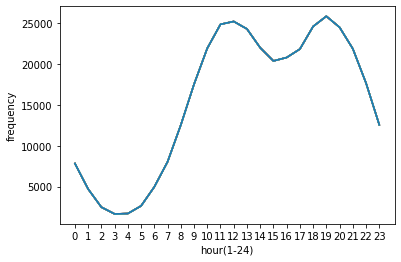

In [190]:
plt.plot(hours,fd.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel("hour(1-24)")
plt.ylabel("frequency")
plt.show()

**What products are most often sold together**

In [198]:
n1=fd[fd['Order ID'].duplicated(keep=False)]

In [199]:
n1['grouped']=n1.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))

In [202]:
n1=n1[['Order ID','grouped']].drop_duplicates()

In [203]:
n1

,Order ID,grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphon..."
3,162010,"Bose SoundSport Headphones,Bose SoundSport Hea..."
4,162011,"34in Ultrawide Monitor,34in Ultrawide Monitor"
5,162012,"AA Batteries (4-pack),AA Batteries (4-pack)"
6,162013,"34in Ultrawide Monitor,34in Ultrawide Monitor"
...,...,...
186845,278792,"AA Batteries (4-pack),AA Batteries (4-pack)"
186846,278793,"Wired Headphones,Wired Headphones"
186847,278794,"AA Batteries (4-pack),AA Batteries (4-pack)"
186848,278795,"iPhone,iPhone"


# ** What products Sold the most**

In [208]:
quantity_ordered=fd.groupby(['Product']).sum().sort_values('Quantity Ordered',ascending=False)

In [211]:
products=[product for product, fd in fd.groupby(['Product'])]

In [234]:
quantity_ordered

,Quantity Ordered,Price Each,month,sales,hour,minute,count
Product,,,,,,,
AAA Batteries (4-pack),62034,123433.18,292740,185481.66,594664,1224226,41282
AA Batteries (4-pack),55270,158031.36,291116,212236.80,596684,1218078,41154
USB-C Charging Cable,47950,523481.70,309638,573002.50,629290,1295172,43806
Lightning Charging Cable,46434,647574.20,306184,694188.30,625058,1268884,43316
Wired Headphones,41114,452790.36,266794,492956.86,543440,1108046,37764
Apple Airpods Headphones,31322,4664700.00,218954,4698300.00,446608,911140,31098
Bose SoundSport Headphones,26914,2664733.50,188226,2691130.86,384890,785206,26650
27in FHD Monitor,15100,2251949.86,105116,2264849.00,215080,439896,15014
iPhone,13698,9578800.00,95882,9588600.00,197314,403376,13684


# **Visualizing Quantity sold by product **

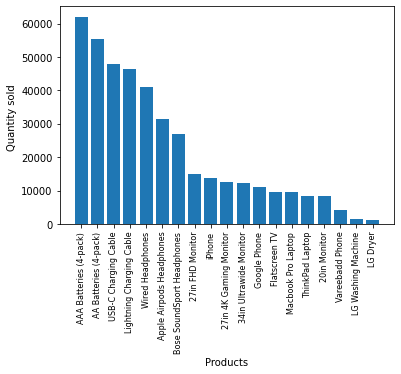

In [236]:
plt.bar(quantity_ordered.iloc[:,0].keys(),list(quantity_ordered['Quantity Ordered']))
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity sold ')
plt.show() 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [238]:
prices=fd.groupby(['Product']).mean()['Price Each']

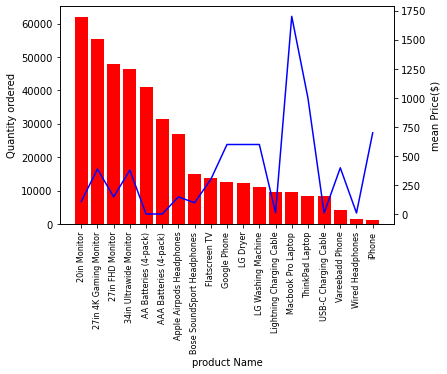

In [261]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(quantity_ordered.iloc[:,0].keys(),list(quantity_ordered['Quantity Ordered']), color='red')
ax2.plot(quantity_ordered.iloc[:,0].keys(),list(dict(prices).values()),'b-')
ax1.set_xlabel('product Name')
ax1.set_ylabel('Quantity ordered')
ax2.set_ylabel('mean Price($)')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()
